<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

<img src="small_images.jpg" />

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

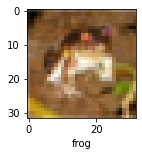

In [ ]:
plot_sample(X_train, y_train, 0)

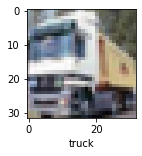

In [ ]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])



In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


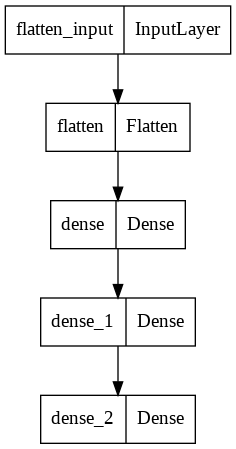

In [ ]:
import pydot
from tensorflow import keras
keras.utils.plot_model(ann)

In [ ]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:


ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 92s 58ms/step - loss: 1.8075 - accuracy: 0.3535
Epoch 2/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.6202 - accuracy: 0.4289
Epoch 3/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.5407 - accuracy: 0.4562
Epoch 4/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.4811 - accuracy: 0.4771
Epoch 5/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.4310 - accuracy: 0.4959


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.43      0.51      1000
           1       0.72      0.42      0.53      1000
           2       0.41      0.20      0.26      1000
           3       0.32      0.41      0.36      1000
           4       0.29      0.68      0.40      1000
           5       0.44      0.30      0.35      1000
           6       0.51      0.54      0.53      1000
           7       0.61      0.39      0.48      1000
           8       0.42      0.78      0.55      1000
           9       0.74      0.30      0.43      1000

    accuracy                           0.44     10000
   macro avg       0.51      0.44      0.44     10000
weighted avg       0.51      0.44      0.44     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

Number of parameters in a CONV layer would be : 

((m * n * d)+1)* k), added 1 because of the bias term for each filter. The same expression can be written as follows: 

((shape of width of the filter (m) * shape of height of the filter (n)* number of filters in the previous layer (d)+1)*number of filters (k)).

 Where the term “filter” refer to the number of filters in the current layer.


First Conv2D Layer= ((3x3x3) +1) x 32 = 896

---




Second Conv2D Layer = ((3x3x32)+1) x 64= 18496


Dense_3= (2304x64)+64= 147520


Dense_4=(64x10)+10=650







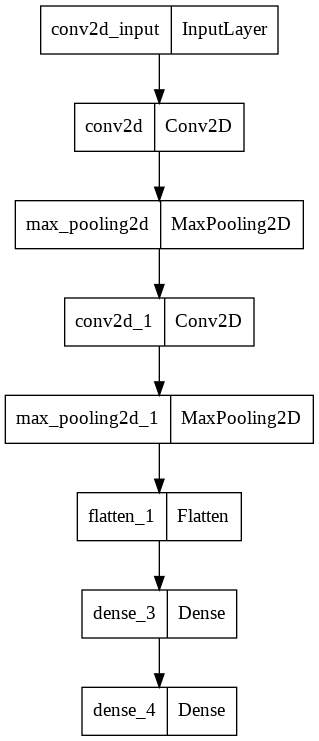

In [ ]:
import pydot
from tensorflow import keras
keras.utils.plot_model(cnn)

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4231 - accuracy: 0.4889
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0778 - accuracy: 0.6220
Epoch 3/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9548 - accuracy: 0.6677
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8614 - accuracy: 0.7003
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7951 - accuracy: 0.7244
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7357 - accuracy: 0.7436
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6829 - accuracy: 0.7629
Epoch 8/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6333 - accuracy: 0.7797
Epoch 9/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.5894 - accuracy: 0.7942
Epoch 10/10
1563/1563 [==============================] - 55s 35m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9867 - accuracy: 0.6854


[0.9866526126861572, 0.6854000091552734]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[5.53890190e-04, 9.65223880e-05, 5.89004532e-02, 6.70453012e-01,
        1.78014510e-04, 9.58964135e-03, 1.73448529e-02, 4.88625774e-05,
        2.42718443e-01, 1.16396033e-04],
       [9.63867205e-05, 3.12214233e-02, 8.07389079e-05, 1.68015015e-06,
        2.84422552e-09, 1.09351248e-08, 1.43815271e-07, 2.59742872e-09,
        9.68083739e-01, 5.15830645e-04],
       [1.47465125e-01, 1.51178882e-01, 7.56925344e-03, 5.75547032e-02,
        9.53484513e-03, 6.21757004e-03, 7.14680646e-04, 6.61072880e-02,
        4.42034364e-01, 1.11623265e-01],
       [9.81101573e-01, 9.71637492e-05, 3.39491735e-03, 1.63206737e-03,
        3.35881184e-03, 1.73330583e-04, 1.39608164e-04, 1.73971668e-04,
        9.69448499e-03, 2.34098203e-04],
       [1.74358817e-07, 2.63571674e-05, 1.74269620e-02, 8.68607499e-03,
        8.64731133e-01, 8.58315907e-04, 1.08240500e-01, 1.36211538e-05,
        1.66616974e-05, 2.20923269e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

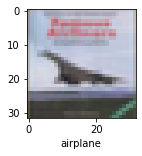

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
classes[y_classes[3]]

'airplane'

# Same Padding 
In this type of padding, the padding layers append zero values in the outer frame of the images or data so the filter we are using can cover the edge of the matrix and make the inference with them too.

Below the model is an example of how we can create a model with the same padding.

## CNN With Padding

In [ ]:
cnn1 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3),padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_5 (Dense)             (None, 64)               

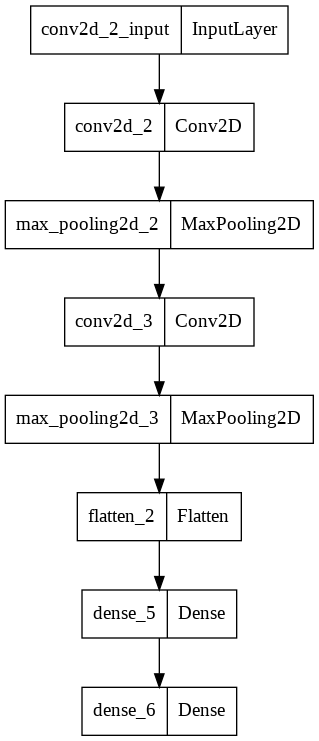

In [ ]:
import pydot
from tensorflow import keras
keras.utils.plot_model(cnn1)

In [ ]:
cnn1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn1.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.4261 - accuracy: 0.4916
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0769 - accuracy: 0.6240
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9482 - accuracy: 0.6682
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8650 - accuracy: 0.6974
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7935 - accuracy: 0.7240
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7380 - accuracy: 0.7424
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6885 - accuracy: 0.7594
Epoch 8/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6416 - accuracy: 0.7777
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6036 - accuracy: 0.7891
Epoch 10/10
1563/1563 [==============================] - 72s 46m

In [ ]:
cnn1.evaluate(X_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.9916 - accuracy: 0.6806


[0.9916142821311951, 0.6805999875068665]

In [ ]:
y_pred = cnn1.predict(X_test)
y_pred[:5]

array([[1.3064705e-04, 8.8570843e-05, 7.0319955e-05, 6.0578907e-01,
        5.9254057e-06, 3.9164621e-01, 2.0160584e-03, 8.4309526e-05,
        1.6399444e-04, 5.0189428e-06],
       [1.6868346e-03, 7.1748033e-02, 8.5992551e-06, 2.6308285e-06,
        6.2857417e-08, 1.3639995e-08, 3.0008710e-05, 4.8086353e-09,
        9.2552513e-01, 9.9877140e-04],
       [3.2207921e-01, 5.0487235e-02, 1.1443011e-03, 2.4497018e-03,
        1.0067987e-03, 1.3001729e-04, 7.4525242e-04, 1.4959420e-04,
        5.9226143e-01, 2.9546490e-02],
       [8.8115704e-01, 5.7140375e-03, 5.2145086e-02, 7.3153031e-04,
        7.4322667e-04, 5.0341056e-05, 1.7553620e-04, 3.1734007e-06,
        5.9211675e-02, 6.8345165e-05],
       [4.3281324e-07, 1.5530889e-06, 1.6781539e-02, 1.4590027e-02,
        7.3955350e-02, 5.1552954e-04, 8.9364946e-01, 9.0639787e-07,
        4.9507618e-04, 1.0109936e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

# Valid Padding
This type of padding can be considered as no padding. Why is there no padding we will understand after the example of a model? Let’s just look at the example. 